# Exploratory Data Analysis of Powerlifting Meets

The cells below read in the data and import the libraries to assist with the analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data1 = './data_powerlifting/openpowerlifting.csv'
data2 = './data_powerlifting/meets.csv'
powerlift = pd.read_table(data1, sep=',')
meets = pd.read_table(data2, sep=',')
powerlift_meets = pd.merge(powerlift, meets)
power = powerlift_meets

The cell below repaces the names of the columns to be lowercase for easier coding during the analysis

In [2]:
powerlift.rename(str.lower, axis='columns', inplace = True)

In [3]:
powerlift.head()

,meetid,name,sex,equipment,age,division,bodyweightkg,weightclasskg,squat4kg,bestsquatkg,bench4kg,bestbenchkg,deadlift4kg,bestdeadliftkg,totalkg,place,wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


There are 24 columns and 386,414 unique rows of data in this set.

In [4]:
power.shape

(386414, 24)

In [5]:
powerlift.bestsquatkg.describe()

count    298071.000000
mean        176.569941
std          69.222785
min        -477.500000
25%         127.500000
50%         174.630000
75%         217.720000
max         573.790000
Name: bestsquatkg, dtype: float64

Exploiring just the squat data, I find that there are negative numbers.  After further analysis, this is due to missed lifts being recorded as negative of the attempted value.

In [6]:
powerlift.notnull().sum()

meetid            386414
name              386414
sex               386414
equipment         386414
age               147147
division          370571
bodyweightkg      384012
weightclasskg     382602
squat4kg            1243
bestsquatkg       298071
bench4kg            1962
bestbenchkg       356364
deadlift4kg         2800
bestdeadliftkg    317847
totalkg           363237
place             385322
wilks             362194
dtype: int64

Columns that have 4kg have many missing data points and won't be needed for the later modeling.  These columns will be dropped to remove the noise they could create with so many values missing.

In [7]:
powerlift.drop(['squat4kg', 'bench4kg', 'deadlift4kg'], axis=1, inplace=True)
powerlift.dropna(inplace=True)
powerlift.shape

(96753, 14)

Removed all rows with missing data since there is plenty of data in the set.

In [8]:
powerlift.head()

,meetid,name,sex,equipment,age,division,bodyweightkg,weightclasskg,bestsquatkg,bestbenchkg,bestdeadliftkg,totalkg,place,wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,142.88,95.25,163.29,401.42,1,456.38
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,170.10,77.11,145.15,392.36,1,424.40
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,124.74,95.25,163.29,383.28,1,391.98


The dataset contains male and female data.  I will split these groups apart into separate dataframes to analyze each population separately.

In [9]:
female_lifters = powerlift.loc[powerlift['sex'] == 'F']
male_lifters = powerlift.loc[powerlift['sex'] == 'M']

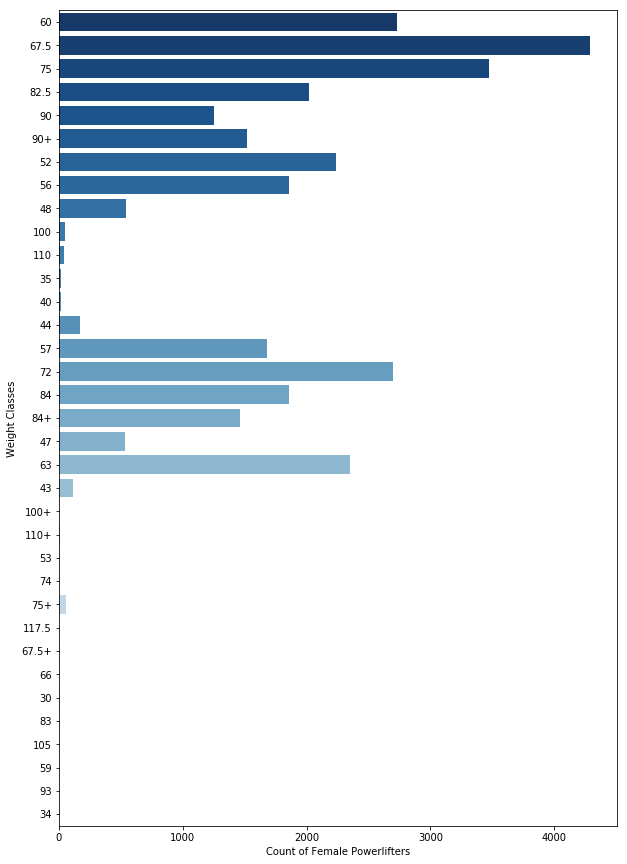

In [10]:
plt.figure(figsize=(10,15))
weight_classes_f = sns.countplot(y='weightclasskg', data = female_lifters, palette='Blues_r')
weight_classes_f.set(xlabel='Count of Female Powerlifters', ylabel='Weight Classes');

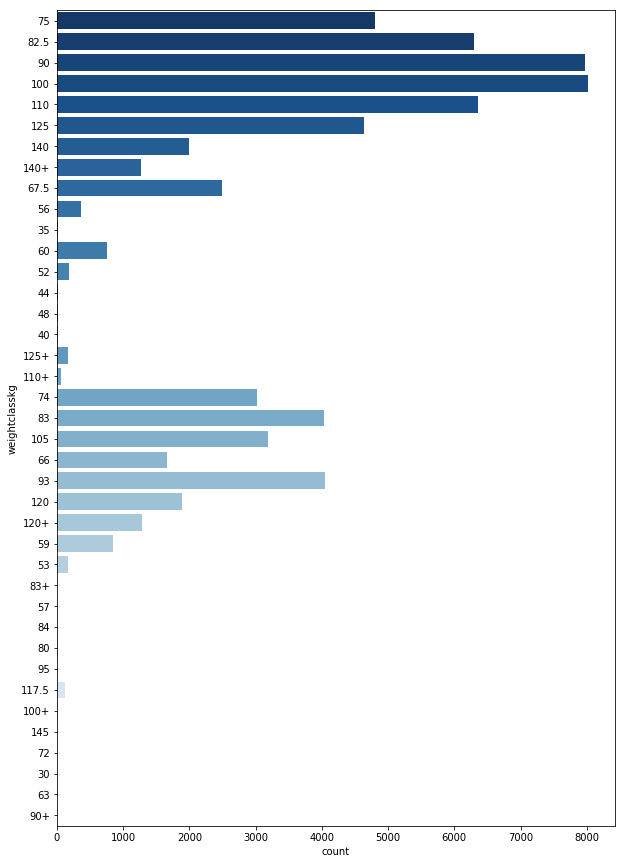

In [11]:
plt.figure(figsize=(10,15))
weight_classes_m = sns.countplot(y='weightclasskg', data = male_lifters, palette='Blues_r')

Weightclasses will be important to classify data

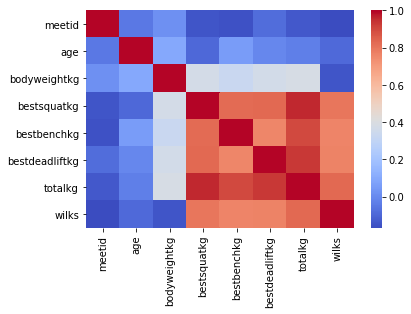

In [15]:
corr_f = female_lifters.corr()                  
sns.heatmap(corr_f, cmap='coolwarm');
plt.savefig('heatmap.png')

Heatmap shows a high correlation of the lifts to each other.  Some of the data will be needed to converted to categorical number data to be effective for predicting data.

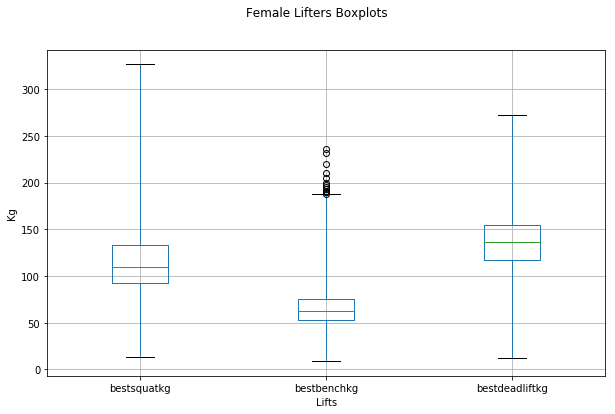

In [13]:
female_lifters.boxplot(column = ['bestsquatkg', 'bestbenchkg', 'bestdeadliftkg'], whis=5,figsize=(10,6));
plt.title("");
plt.suptitle('Female Lifters Boxplots');
plt.xlabel('Lifts');
plt.ylabel('Kg');

## Boxplots of the female lifts

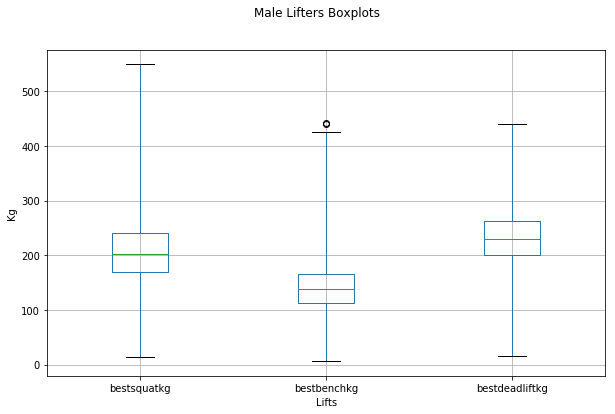

In [14]:
male_lifters.boxplot(column = ['bestsquatkg', 'bestbenchkg', 'bestdeadliftkg'], whis=5,figsize=(10,6));
plt.title("");
plt.suptitle('Male Lifters Boxplots');
plt.xlabel('Lifts');
plt.ylabel('Kg');

## Boxplots of the male lifts

In [18]:
weight_histo = powerlift.weightclasskg.value_counts()
weight_histo;

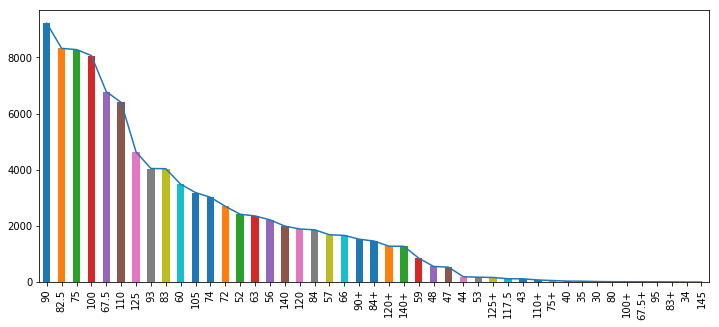

In [40]:
weight_histo.plot(figsize=(12,5))
weight_histo.plot(kind='bar');
plt.savefig('bar_weightclassall.png')

In [63]:
pairplots_lifts = powerlift.filter(['bodyweightkg',
    'bestsquatkg',
                              'bestbenchkg',
                              'bestdeadliftkg',
                              'totalkg',], axis=1)

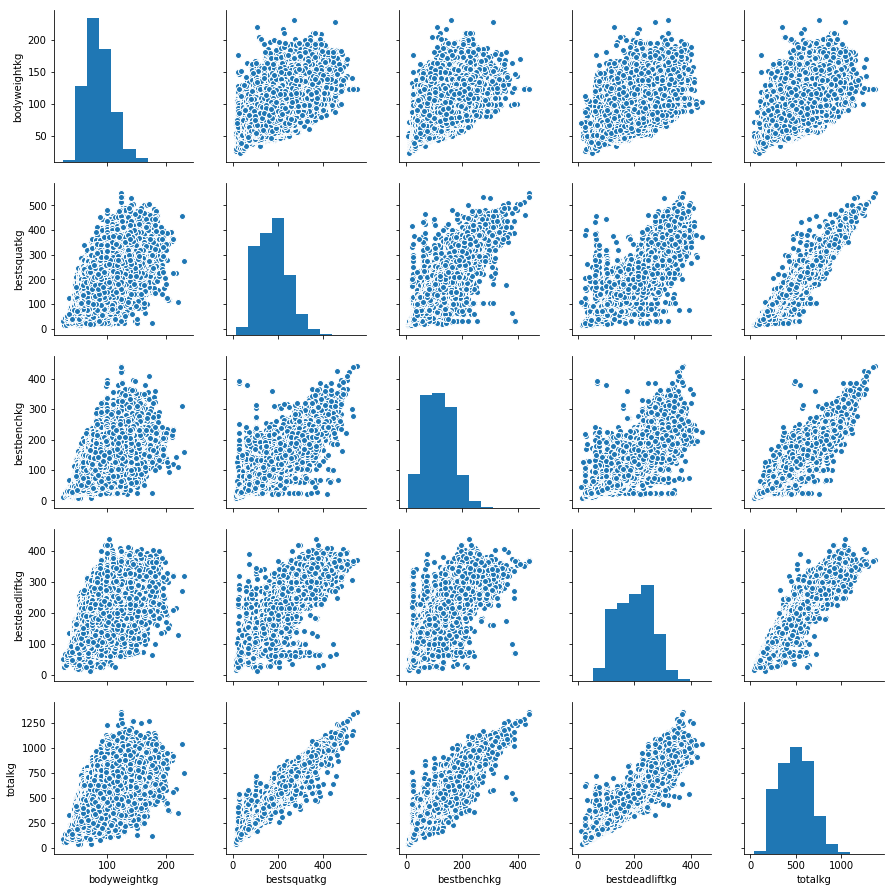

In [64]:
sns.pairplot(pairplots_lifts);
plt.savefig('pairplot.png')

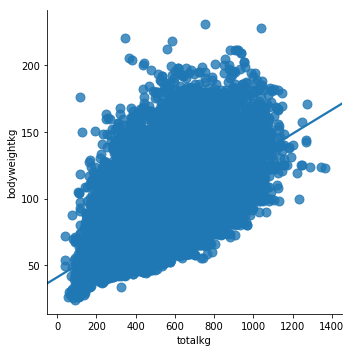

In [51]:
sns.lmplot(x="totalkg", y="bodyweightkg", data=powerlift, ci=None, scatter_kws={"s": 80});

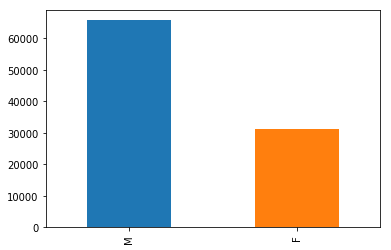

In [62]:
gender = powerlift.filter(['sex'], axis=1)
gender = gender.sex.value_counts()
gender.plot(kind='bar');
plt.savefig('gender_bar.png')